### 5. Visualizing learned filters and activations (6 points)
It is sometimes useful to visualize what kind of filters a CNN have learned. One way to do so is to plot each filter of size [kernel_size $\times$ kerne_size]. 

- Once your CNN (in Question 6) is trained, access its filters via 'tf.get_collection' and plot them on a grid for each layer. What patterns do you observe, why?
- In addition, plot the activations of each layer for two images chosen from digit-classes '2' and '9'. Discuss your observations

Hint: 
+ Activations are for example the outputs of tf.layers.conv2D.
+ Use tf.get_collection to access the learned filters of each layers. For this, you need to know how they are named (which can be accessed by tf.trainable_variables among other means of doing so).

The plotted feature maps and learned filters should be plotted in the same way as in the images bellow. (left: Feature Maps, right: learned Filters)

![Examples of activation maps (left), and learned features (right))](im.png)

Instructions for updating:
Use `tf.GraphKeys.GLOBAL_VARIABLES` instead.
Learned filters for convolutional layer 1:



<Figure size 432x288 with 0 Axes>

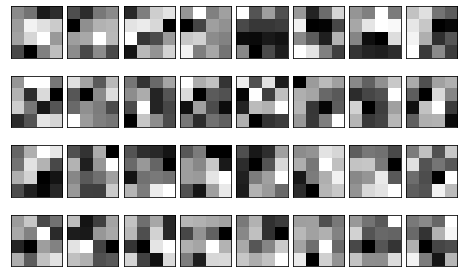

Activation for a two on layer 1:



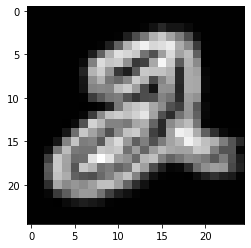

Activation for a nine on layer 1:



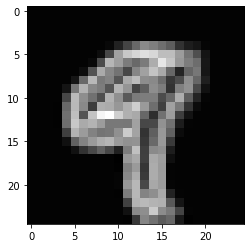

Learned filters for convolutional layer 2:



<Figure size 432x288 with 0 Axes>

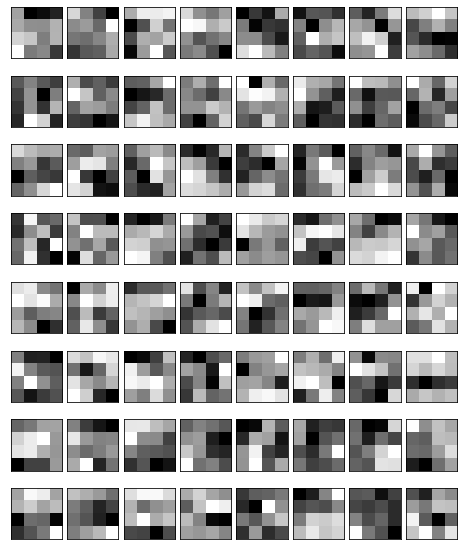

Activation for a two on layer 2:



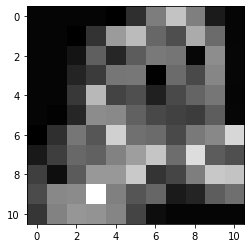

Activation for a nine on layer 2:



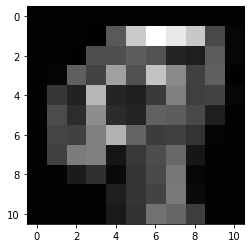

Learned filters for convolutional layer 3:



<Figure size 432x288 with 0 Axes>

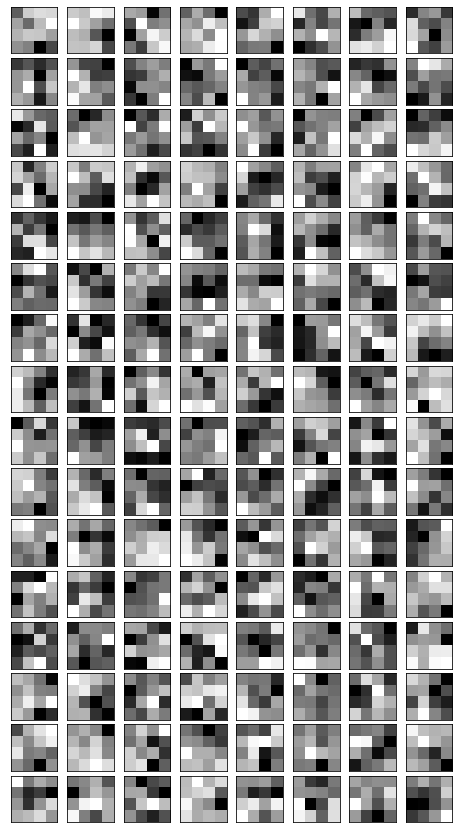

Activation for a two on layer 3:



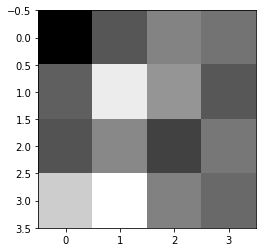

Activation for a nine on layer 3:



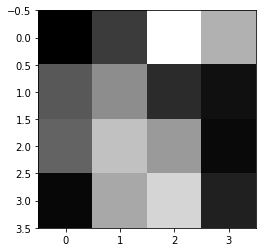

In [9]:
# print(tf.trainable_variables())

# <tf.Variable 'CNN/conv2d/kernel:0' shape=(4, 4, 1, 32) dtype=float32>
# <tf.Variable 'CNN/conv2d/bias:0' shape=(32,) dtype=float32>
# <tf.Variable 'CNN/conv2d_1/kernel:0' shape=(4, 4, 1, 64) dtype=float32>
# <tf.Variable 'CNN/conv2d_1/bias:0' shape=(64,) dtype=float32>
# <tf.Variable 'CNN/conv2d_2/kernel:0' shape=(4, 4, 1, 128) dtype=float32>
# <tf.Variable 'CNN/conv2d_2/bias:0' shape=(128,) dtype=float32>
# <tf.Variable 'CNN/dense/kernel:0' shape=(21632, 10) dtype=float32>
# <tf.Variable 'CNN/dense/bias:0' shape=(10,) dtype=float32>

# These variables have only one element
#bias1 = tf.get_collection(tf.GraphKeys.VARIABLES, scope='CNN/conv2d/bias:0')[0]
filter1 = tf.get_collection(tf.GraphKeys.VARIABLES, scope='CNN/h1_0/kernel:0')[0]
filter2 = tf.get_collection(tf.GraphKeys.VARIABLES, scope='CNN/h2_0/kernel:0')[0]
filter3 = tf.get_collection(tf.GraphKeys.VARIABLES, scope='CNN/h3_0/kernel:0')[0]
filters = [filter1, filter2, filter3]
shapes = [(4,8), (8,8), (16,8)]
layers = [model.inputL, model.conv1, model.conv2]
two_index = 5
nine_index = 4
aTwo = x_train[two_index]
aNine = x_train[nine_index]
aTwo = [np.expand_dims(aTwo, axis=2)]
aNine = [np.expand_dims(aNine, axis=2)]

for i in range(0, 3):
    # Normalise the data to values between 0 and 1. Makes it easier to view.
    whole_thing = plt.figure()
    f1asnumpy = sess.run(filters[i])
    minimum = f1asnumpy.min()
    f1asnumpy -= minimum
    maximum = f1asnumpy.max()
    scale = 1/maximum
    f1asnumpy *= scale
    num_filters = f1asnumpy.shape[3]
    f = plt.figure(figsize=(8,5*(i+1)))
    f.subplots_adjust(wspace=0.1, hspace=0.1)

    print("Learned filters for convolutional layer " + str(i+1) + ":\n")
    for filt in range(0, num_filters):
        # Batch size is 0 for now (update this if this changes)
        f1ForThisFilter = f1asnumpy[:, :, 0, filt]
        f.add_subplot(shapes[i][0], shapes[i][1], filt+1)
        fig = plt.imshow(f1ForThisFilter, cmap='gray')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)

    #plt.savefig('filters_' + str(i) + '.png')
    plt.show()
    plt.figure()
    
    print("Activation for a two on layer " + str(i+1) + ":\n")
    summarisedTwo = np.squeeze(sess.run(layers[i], feed_dict={model.im: aTwo}).sum(3), 0)
    twoMin = summarisedTwo.min()
    summarisedTwo -= twoMin
    twoMax = summarisedTwo.max()
    summarisedTwo *= 1/twoMax
    whole_thing.add_subplot(1, 2, 2)
    plt.imshow(summarisedTwo, cmap='gray')
    
    #plt.savefig('two_' + str(i) + '.png')
    plt.show()
    plt.figure()
    
    print("Activation for a nine on layer " + str(i+1) + ":\n")
    summarisedNine = np.squeeze(sess.run(layers[i], feed_dict={model.im: aNine}).sum(3), 0)
    nineMin = summarisedNine.min()
    summarisedNine -= nineMin
    nineMax = summarisedNine.max()
    summarisedNine *= 1/nineMax
    plt.imshow(summarisedNine, cmap='gray')
    
    #plt.savefig('nine_' + str(i) + '.png')
    plt.show()

In [10]:
sess.close()